In [3]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import online_retail_analysis.utils.paths as path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans as KMeans

# sns.set_style("whitegrid")
%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

In [6]:
df_proces = pd.read_csv(path.data_processed_dir('data_clean.csv'))
df_proces['InvoiceDate']= pd.to_datetime(df_proces['InvoiceDate'])

In [7]:
from online_retail_analysis.features.build_features import Calculate_RFMV , score_rfmv

df_rfm = Calculate_RFMV(df_proces, 'StockCode')
df_rfm_score = score_rfmv(df_rfm)
df_rfm_score

,Recency,MonetaryValue,Frequency,Total_Score
StockCode,,,,
10002,235,504.050,49,6
10080,18,118.040,21,6
10120,5,80.640,29,5
10123C,253,3.250,3,3
10124A,33,6.720,5,4
...,...,...,...,...
C2,5,"1,139.000",133,8
DOT,4,136.000,16,7
M,1,"2,070.290",279,12


In [115]:
df = pd.merge(df_rfm_score,df_proces,on="StockCode")
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 392691
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   StockCode      392692 non-null  object        
 1   Recency        392692 non-null  int64         
 2   MonetaryValue  392692 non-null  float64       
 3   Frequency      392692 non-null  int64         
 4   Total_Score    392692 non-null  int64         
 5   InvoiceNo      392692 non-null  int64         
 6   Description    392692 non-null  object        
 7   Quantity       392692 non-null  float64       
 8   InvoiceDate    392692 non-null  datetime64[ns]
 9   UnitPrice      392692 non-null  float64       
 10  CustomerID     392692 non-null  float64       
 11  Country        392692 non-null  object        
 12  date           392692 non-null  object        
 13  month          392692 non-null  int64         
 14  days           392692 non-null  object        
 15  

In [118]:
ratings = df.groupby('Description')['Total_Score'].describe()
ratings.head()
ratings = ratings.sort_values(['count','mean'], ascending=False) 
ratings.head(10)


,count,mean,std,min,25%,50%,75%,max
Description,,,,,,,,
WHITE HANGING HEART T-LIGHT HOLDER,"2,016.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
REGENCY CAKESTAND 3 TIER,"1,713.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
JUMBO BAG RED RETROSPOT,"1,615.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
ASSORTED COLOUR BIRD ORNAMENT,"1,395.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
PARTY BUNTING,"1,389.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
LUNCH BAG RED RETROSPOT,"1,303.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
SET OF 3 CAKE TINS PANTRY DESIGN,"1,152.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
POSTAGE,"1,099.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
LUNCH BAG BLACK SKULL.,"1,078.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000


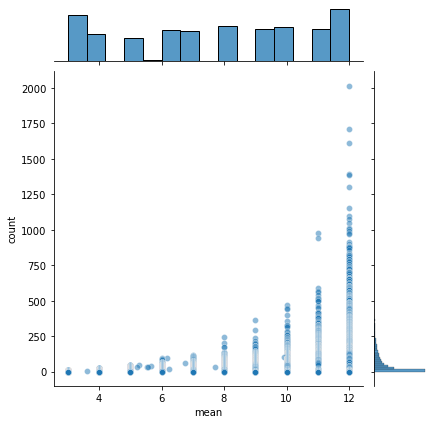

In [119]:
sns.jointplot(x='mean',y='count',data=ratings,alpha=0.5,kind='scatter')

In [86]:
feature_df = df.pivot_table(index='StockCode',columns='CustomerID',values='Total_Score').fillna(0)
feature_df.head()

CustomerID,"12,346.000","12,347.000","12,348.000","12,349.000","12,350.000","12,352.000","12,353.000","12,354.000","12,355.000","12,356.000",...,"18,273.000","18,274.000","18,276.000","18,277.000","18,278.000","18,280.000","18,281.000","18,282.000","18,283.000","18,287.000"
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10080,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10120,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10123C,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10124A,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [24]:
Corr_Matrix=feature_df.T.corr()

def Corr_matrix_suggestions(product_stockCode):
    suggestions = Corr_Matrix[product_stockCode].sort_values(ascending=False)
    return suggestions
Corr_Matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000,-0.006,0.088,0.089,-0.003,-0.003,0.081,0.049,0.086,0.087,...,-0.002,-0.001,-0.003,-0.001,-0.005,0.022,-0.001,0.048,-0.003,0.054
10080,-0.006,1.000,-0.005,-0.002,-0.002,-0.002,0.026,0.036,0.039,-0.007,...,-0.001,-0.001,-0.002,-0.001,-0.003,-0.005,-0.001,0.002,-0.002,-0.019
10120,0.088,-0.005,1.000,0.114,-0.003,-0.002,0.049,0.049,0.031,0.053,...,-0.002,-0.001,-0.002,-0.001,-0.004,-0.006,-0.001,0.057,-0.002,-0.010
10123C,0.089,-0.002,0.114,1.000,-0.001,-0.001,0.163,-0.004,-0.004,-0.003,...,-0.001,-0.000,-0.001,-0.000,-0.001,-0.002,-0.000,-0.006,-0.001,-0.008
10124A,-0.003,-0.002,-0.003,-0.001,1.000,0.447,0.061,0.040,-0.005,-0.003,...,-0.001,-0.001,-0.001,-0.001,-0.002,-0.003,-0.001,-0.007,-0.001,-0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0.022,-0.005,-0.006,-0.002,-0.003,-0.002,-0.009,0.025,0.008,0.048,...,-0.002,-0.001,-0.002,-0.001,-0.004,1.000,-0.001,0.009,-0.002,-0.002
DOT,-0.001,-0.001,-0.001,-0.000,-0.001,-0.000,-0.002,-0.002,0.103,0.150,...,-0.000,-0.000,-0.000,-0.000,-0.001,-0.001,1.000,-0.003,-0.000,-0.004
M,0.048,0.002,0.057,-0.006,-0.007,-0.007,0.050,0.040,0.037,0.088,...,0.047,-0.003,0.036,-0.003,0.082,0.009,-0.003,1.000,-0.006,0.012


In [82]:
stockCode = Corr_matrix_suggestions("10002")
stockCode = stockCode.reset_index()
stockCode
# df[['CustomerID','Description','StockCode']].nunique()
merge = df[['CustomerID','Description','StockCode']].merge(stockCode.reset_index(),how='inner',on='StockCode')#left_index=True, right_index=True
merge = merge.sort_values('10002',ascending=False)
merge = merge[merge['10002']!=1]
merge.head(10)

,CustomerID,Description,StockCode,index,10002
390224,"14,911.000",PURPLE FRANGIPANI NECKLACE,90103,1,0.223
390225,"12,748.000",PURPLE FRANGIPANI NECKLACE,90103,1,0.223
77827,"18,283.000",EIGHT PIECE DINOSAUR SET,21826,2,0.193
77819,"14,078.000",EIGHT PIECE DINOSAUR SET,21826,2,0.193
77820,"12,748.000",EIGHT PIECE DINOSAUR SET,21826,2,0.193
77821,"12,748.000",EIGHT PIECE DINOSAUR SET,21826,2,0.193
77822,"14,037.000",EIGHT PIECE DINOSAUR SET,21826,2,0.193
77823,"17,799.000",EIGHT PIECE DINOSAUR SET,21826,2,0.193
77825,"12,673.000",EIGHT PIECE DINOSAUR SET,21826,2,0.193
77826,"18,041.000",EIGHT PIECE DINOSAUR SET,21826,2,0.193


In [120]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [121]:
distances=['manhattan','minkowski','cosine']
feature_df_matrix = csr_matrix(feature_df.values)
for i in distances:

  model_knn = NearestNeighbors(metric =str(i), algorithm = 'brute')
  model_knn.fit(feature_df_matrix)

  distances, indices = model_knn.kneighbors(feature_df.iloc[0,:].values.reshape(1, -1), n_neighbors = 6)

  print("\nCalculating Reccomendations by " + str(i) + " distance metric ")
  
  for j in range(0,len(distances.flatten())):
    if j == 0 :
      print("\nRecommendations for Product : " , feature_df.index[0])
    else:
      print(j , ":" , feature_df.index[indices.flatten()[j]] , "with " + str(i) + " distance of" , round(distances.flatten()[j],3))


Calculating Reccomendations by manhattan distance metric 

Recommendations for Product :  10002
1 : 90103 with manhattan distance of 232.0
2 : 90059F with manhattan distance of 236.0
3 : 90059C with manhattan distance of 236.0
4 : 90059B with manhattan distance of 236.0
5 : 90059E with manhattan distance of 236.0

Calculating Reccomendations by minkowski distance metric 

Recommendations for Product :  10002
1 : 90103 with minkowski distance of 37.094
2 : 90059E with minkowski distance of 37.31
3 : 90059C with minkowski distance of 37.31
4 : 90101 with minkowski distance of 37.31
5 : 90059F with minkowski distance of 37.31

Calculating Reccomendations by cosine distance metric 

Recommendations for Product :  10002
1 : 90103 with cosine distance of 0.776
2 : 21826 with cosine distance of 0.802
3 : 90101 with cosine distance of 0.817
4 : 90059E with cosine distance of 0.817
5 : 16010 with cosine distance of 0.817


In [129]:
model_knn = NearestNeighbors(metric ='cosine', algorithm = 'brute')
model_knn.fit(feature_df_matrix)
distances, indices = model_knn.kneighbors(feature_df.iloc[0,:].values.reshape(1, -1), n_neighbors = 10)

stockCode=[]
cosine=[]
for i in range(0,len(distances.flatten())):
    if i == 0 :
        print("Recommendations for Product : " , feature_df.index[0])
    else:
        stockCode.append(feature_df.index[indices.flatten()[i]])
        cosine.append(distances.flatten()[i])
        recommendation = pd.DataFrame({"StockCode" : stockCode , "Distance" : cosine })

recommendation=recommendation.sort_values(by='Distance', ascending=False, ignore_index= True)
recommendation

Recommendations for Product :  10002


,StockCode,Distance
0,84535A,0.819
1,90101,0.817
2,90059E,0.817
3,16010,0.817
4,90059C,0.817
5,90059F,0.817
6,90059B,0.817
7,21826,0.802
8,90103,0.776


In [133]:
# df[['CustomerID','Description','StockCode']].nunique()
merge = df[['CustomerID','Description','StockCode']].merge(recommendation,how='inner',on='StockCode')#left_index=True, right_index=True
merge

,CustomerID,Description,StockCode,Distance
0,"12,748.000",FOLDING CAMPING SCISSOR W/KNIF & S,16010,0.817
1,"17,337.000",FOLDING CAMPING SCISSOR W/KNIF & S,16010,0.817
2,"15,068.000",FOLDING CAMPING SCISSOR W/KNIF & S,16010,0.817
3,"14,078.000",EIGHT PIECE DINOSAUR SET,21826,0.802
4,"12,748.000",EIGHT PIECE DINOSAUR SET,21826,0.802
...,...,...,...,...
56,"14,076.000",WHITE FRANGIPANI NECKLACE,90101,0.817
57,"14,911.000",WHITE FRANGIPANI NECKLACE,90101,0.817
58,"12,748.000",WHITE FRANGIPANI NECKLACE,90101,0.817
59,"14,911.000",PURPLE FRANGIPANI NECKLACE,90103,0.776
